# MultiJob class development
26/09/20

Basic methods now in epsproc.classes.multiJob. Working up better plotting methods here, using existing class as base.


14/09/20
http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/classDev/ePSproc_multijob_class_dev_140920_bemo.ipynb

Working up class-based job handling, see in particular [XeF2 work for a prototype](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html).

## Setup

In [1]:
!hostname

bemo


In [2]:
!conda env list

# conda environments:
#
base                     /home/femtolab/anaconda3
chem                     /home/femtolab/anaconda3/envs/chem
chem3.5                  /home/femtolab/anaconda3/envs/chem3.5
dbtest                   /home/femtolab/anaconda3/envs/dbtest
epsdev                *  /home/femtolab/anaconda3/envs/epsdev
epsdev-150320            /home/femtolab/anaconda3/envs/epsdev-150320
espressoDB               /home/femtolab/anaconda3/envs/espressoDB
fibre-sim                /home/femtolab/anaconda3/envs/fibre-sim
py2.7                    /home/femtolab/anaconda3/envs/py2.7
remote                   /home/femtolab/anaconda3/envs/remote
slides                   /home/femtolab/anaconda3/envs/slides
webDev                   /home/femtolab/anaconda3/envs/webDev



In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
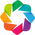

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# Assume job/orb dir format

# Set/check working dir - set for N2O data on Stimpy
currDir = os.getcwd()
if winFlag:
    workingDir = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # UB20 VM shared dir
else:
#     workingDir = r'/mnt/diskstationSSHFS/homes/admin/CloudStation/Backup/STIMPY/D/projects/ePolyScat/n2' # N2 test dataset
    workingDir = r'/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV' # XeF2 test dataset
#     workingDir = !pwd

print(workingDir)


# Scan for subdirs, based on existing routine in getFiles()
fileBase = workingDir
# fType = ''
# fList = [os.path.join(fileBase, f) for f in os.listdir(fileBase) if f.endswith(fType)]

# For other methods overview/refresher, see 
#  - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
#  - https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
#  - Fast recursive subdir (with scandir) https://stackoverflow.com/a/59803793/2441026
# Also epsman routines.

/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV


Compatibility...

- Old structure, with multiple orb output files per dir (but not per E range).
- New structure, with multiple output files per E range, subdirs per orb

Should scan dirs for file types or by stem to confirm?  See ePSman code for ideas...

Maybe just assume that if files are in root dir no E stacking is required? This would fail for single job case however.

How about checking for prefixes, as per wfPlot.py code? Uses epsproc.util.fileListSort to set prefix.

In [7]:
XeF2data = ePSmultiJob(fileBase, verbose = 0)
keys = [0]
XeF2data.scanFiles(keys=keys)
XeF2data.jobsSummary()

Found 1 directories, with 6 files.
Job structure: rootDir

*** Job dir 0 details
Directory: /mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV
6 files
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb12_A1G',
    'event': 'orb 12 ioinzation (Iodine 3d, A1G/SG), sph/ grid',
    'orbE': -703.9884888620219,
    'orbLabel': 'Iodine 3d, A1G/SG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb13_E1G',
    'event': 'orb 13 ioinzation (Iodine 3d, E1G/PG), sph/ grid',
    'orbE': -703.8850855951459,
    'orbLabel': 'Iodine 3d, E1G/PG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb15_E2G',
    'event': 'orb 15 ioinzation (Iodine 3d, E2G/DG), sph/ grid',
    'orbE': -703.626577427956,
    'orbLabel': 'Iodine 3d, E2G/DG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb21_A1G',
    'event': 'orb 21 ioinzation (Iodine 4d, A1G/SG), sph/ grid',
    'orbE': -76.581003676086,
    'orbLabel': 'Iodine 4d, A1G/SG'}
{   'batch': 'ePS xef2,

## Further class dev

In [8]:
# Monkey patch for new plotters
# See, e.g., https://stackoverflow.com/a/2982
# import types

# testClass = XeF2data

# testClass.testFn = types.MethodType(testFn, testClass)

# testClass.lmPlot = types.MethodType(lmPlot, testClass)

### MFPADs and plotting...
Revisit + multijob capabilities...

- Basics from https://epsproc.readthedocs.io/en/latest/demos/ePSproc_demo_Aug2019.html
    - Add fig titles
    - More consistent gridding and rendering (although maybe better to use HV here).
    - Previous issues with Plotly export might now be fixed (currently at Plotly v4.1, see [notes on Github](https://github.com/jupyter/nbconvert/issues/944#issuecomment-511216610), and current [Plotly renderers](https://plotly.com/python/renderers/#builtin-renderers)).
- Revisit multi-E plotting capabilities, also consider with HV and ITK (see wf plotting) which were not previuosly implemented for MFPAD plots.
- Wrap for multijob case.

In [23]:
testClass = XeF2data
TX, TlmX = ep.mfpad(testClass.dataSets[0]['matE'][0], res=[10,50])  # Expand MFPADs

In [24]:
TX.sel({'Eke':slice(1.0,5.0)})

<xarray.DataArray (Euler: 3, Phi: 50, Theta: 10, Eke: 2, Sym: 2)>
array([[[[[-7.79017519e-02-3.51840892e-01j,
            0.00000000e+00+0.00000000e+00j],
          [ 9.83697531e-02+1.50571127e-01j,
            0.00000000e+00+0.00000000e+00j]],

         [[-4.69295022e-02-2.94027015e-01j,
            0.00000000e+00+0.00000000e+00j],
          [ 6.51228301e-02+1.43482062e-01j,
            0.00000000e+00+0.00000000e+00j]],

         [[ 5.80420288e-03-1.61443701e-01j,
            0.00000000e+00+0.00000000e+00j],
          [-2.44534053e-03+1.07634292e-01j,
            0.00000000e+00+0.00000000e+00j]],

         ...,

         [[-5.80420288e-03+1.61443701e-01j,
            0.00000000e+00+0.00000000e+00j],
          [ 2.44534053e-03-1.07634292e-01j,
            0.00000000e+00+0.00000000e+00j]],

         [[ 4.69295022e-02+2.94027015e-01j,
            0.00000000e+00+0.00000000e+00j],
          [-6.51228301e-02-1.43482062e-01j,
            0.00000000e+00+0.00000000e+00j]],

         [[ 7.79017

Plotting with mpl
Data dims: ('Phi', 'Theta', 'Eke'), subplots on Eke


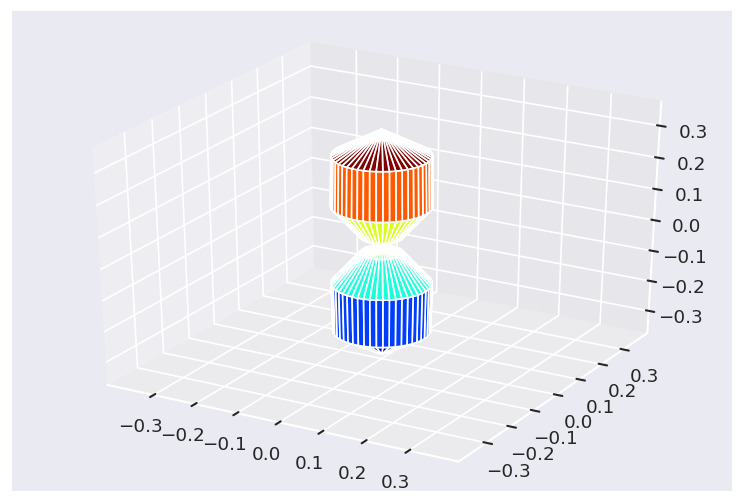

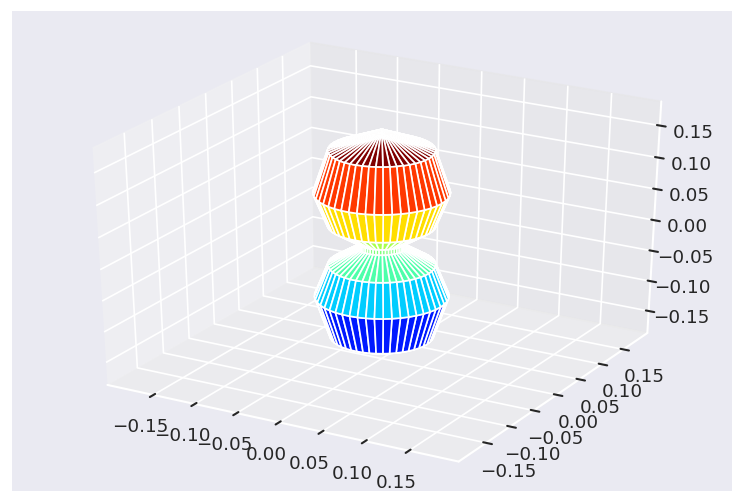

Plotting with mpl
Data dims: ('Phi', 'Theta', 'Eke'), subplots on Eke


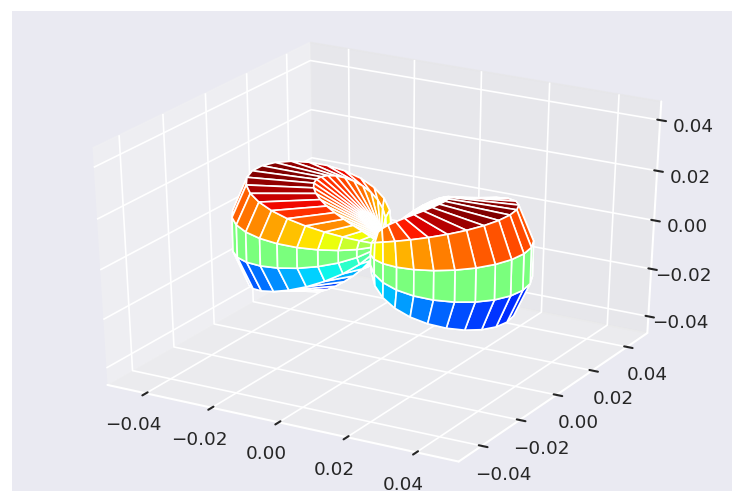

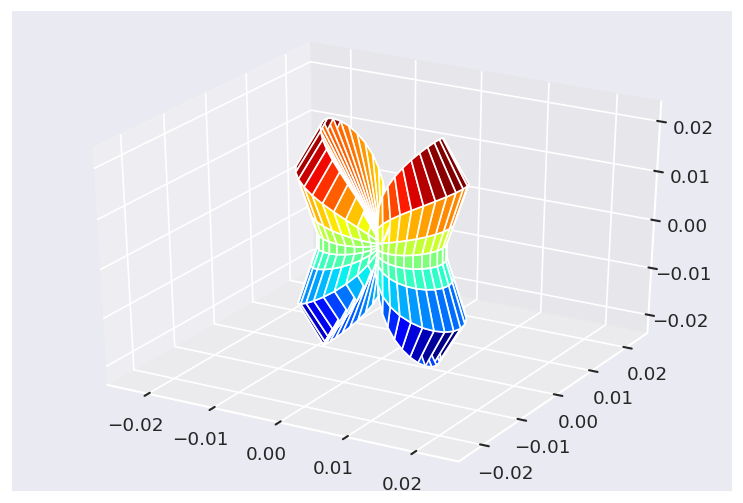

Plotting with mpl
Data dims: ('Phi', 'Theta', 'Eke'), subplots on Eke


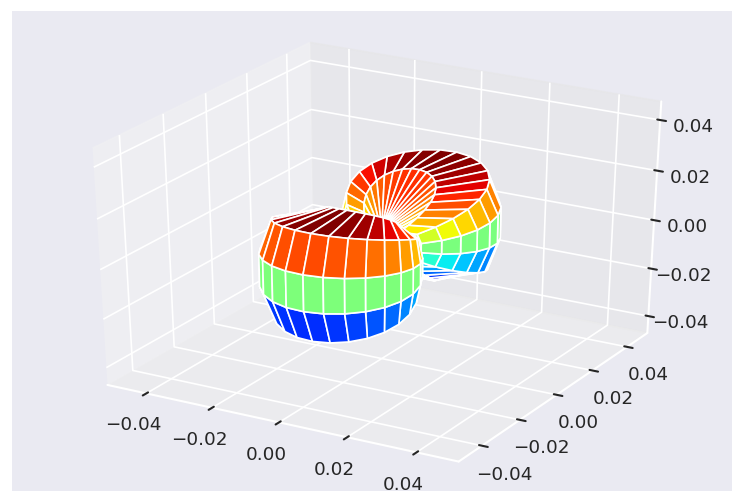

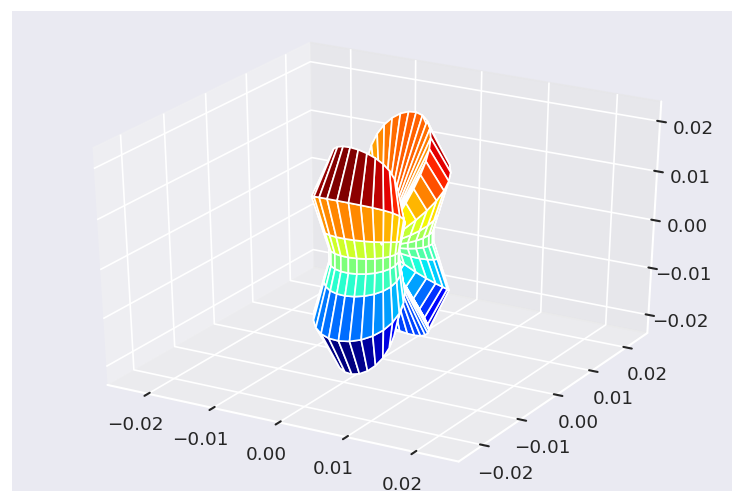

In [25]:
# Plot for each pol geom (symmetry)
for n in range(0,3):
    ep.sphSumPlotX(TX[n].sel({'Eke':slice(1.0,5.0)}).sum('Sym').squeeze(), pType = 'a')

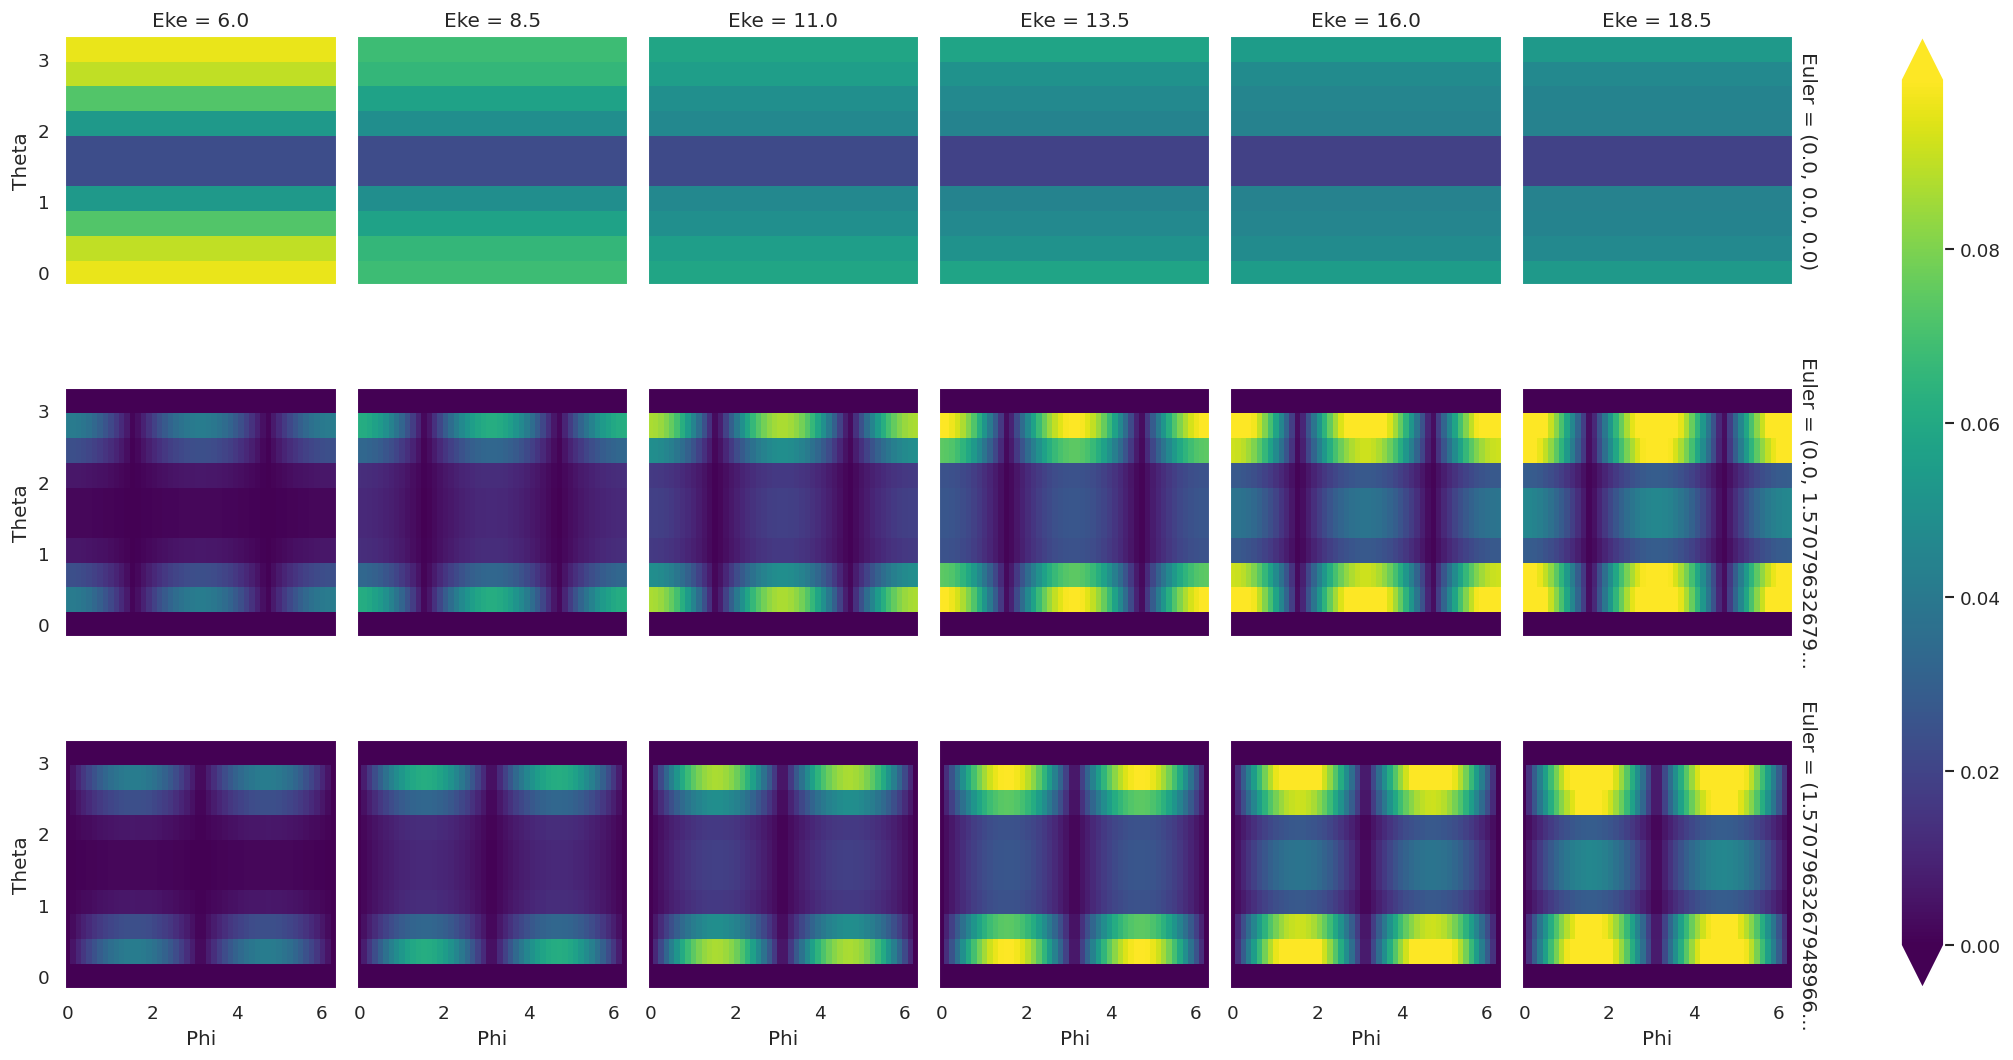

In [26]:
# Plot abs(TX) images using Xarray functionality
TX.sel({'Eke':slice(5.0,20.0)}).sum('Sym').squeeze().pipe(np.abs).plot(y='Theta',x='Phi', row='Euler', col='Eke', robust=True)

In [27]:
##### Pl current fn notes...
# - Fixed rc rounding issue.
# - Wrapper fn. needs rc arg

# If running directly, need to set (theta,phi)
# (theta,phi) grid from Xarray coords
# theta, phi = np.meshgrid(dataPlot.Theta, dataPlot.Phi)

# Try Plotly with looping functionality... this gives 3D interactive surf plots.
# Note this is currently set to expect 3D data only, and loop over 3rd dim.
# This is a work in progress...!
TXplot = TX.sum('Sym').squeeze().isel(Eke=slice(5,10,2))  # Slice E1:E2:step
theta, phi = np.meshgrid(TXplot.Theta, TXplot.Phi)
ep.sphPlot.sphPlotPL(np.abs(TXplot[0]), theta, phi, rc = [1,5]);
# for n in range(0,1):
# ep.sphSumPlotX(TXplot.squeeze(), pType = 'a', rc = [1,5], facetDim='Eke', backend='pl')
# ep.sphSumPlotX(TXplot[0].squeeze(), pType = 'a', facetDim='Eke', backend='pl')

In [14]:
rc = [1,5]
np.round(rc).astype(np.int)  # Fix dtype
print(rc[0])

1


In [15]:
facetDim = 'Eke'
rc = None
dataPlot = TXplot[0].squeeze()

nData = dataPlot[facetDim].size

if rc is None:
    nCols = 3
    rc = [(nData/nCols), nCols]


In [16]:
np.round(rc).astype(np.int)

array([1, 3])

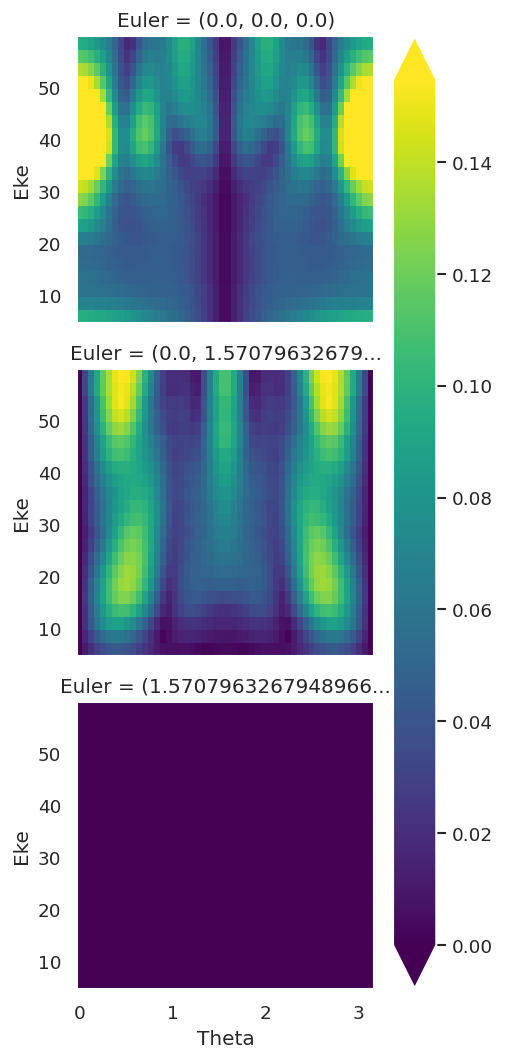

In [17]:
# Reduced form - select on phi and plot E map.
# This should be better for AF case with cylindrical sym!
# ALSO - looks like accidental (theta,phi) defn. switch here?

# # Select on Phi - may have this incorrect...?
# # Plot abs(TX) images using Xarray functionality
TX.sel({'Eke':slice(5.0, 100.0), 'Phi':0}).sum('Sym').squeeze().pipe(np.abs).plot(x='Theta',y='Eke', row='Euler', robust=True)

# Select on Theta - may have this incorrect...?
# Plot abs(TX) images using Xarray functionality
# TX.sel({'Eke':slice(0.0,100.0), 'Theta':0}).sum('Sym').squeeze().pipe(np.abs).plot(x='Phi',y='Eke', row='Euler', robust=True)

In [28]:
TX.sel({'Eke':slice(5.0, 100.0), 'Phi':0}).sum('Sym').squeeze()

<xarray.DataArray (Euler: 3, Theta: 10, Eke: 22)>
array([[[ 9.00581101e-02+3.33126346e-02j,
          6.68119812e-02+1.34175638e-02j,
          5.77621072e-02+9.72592054e-03j,
          5.80371794e-02-7.97696403e-04j,
          5.44333919e-02-1.66845176e-03j,
          5.35224523e-02-2.18100190e-03j,
          6.63213301e-02-3.93598184e-03j,
          8.76529870e-02-1.06600175e-02j,
          1.02303198e-01-2.26339412e-02j,
          1.20828491e-01-4.20873748e-02j,
          1.26019507e-01-6.92222386e-02j,
          1.36825780e-01-1.14324438e-01j,
          1.26381261e-01-1.79880297e-01j,
          6.81487399e-02-2.47827421e-01j,
         -3.56399589e-02-2.81549353e-01j,
         -1.24310373e-01-2.33111486e-01j,
         -1.59504841e-01-1.63702932e-01j,
         -1.60186213e-01-1.07779365e-01j,
         -1.46950959e-01-6.94387750e-02j,
         -1.29415689e-01-4.42608794e-02j,
         -1.11076617e-01-2.80876308e-02j,
         -9.30239601e-02-1.82415657e-02j],
        [ 7.75427081e-02+

In [18]:
# Check angle defns.
res=50
TP = np.meshgrid(np.linspace(0,np.pi,res),np.linspace(0,2*np.pi,res))
TP
TP[1]  #,TP[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12822827, 0.12822827, 0.12822827, ..., 0.12822827, 0.12822827,
        0.12822827],
       [0.25645654, 0.25645654, 0.25645654, ..., 0.25645654, 0.25645654,
        0.25645654],
       ...,
       [6.02672876, 6.02672876, 6.02672876, ..., 6.02672876, 6.02672876,
        6.02672876],
       [6.15495704, 6.15495704, 6.15495704, ..., 6.15495704, 6.15495704,
        6.15495704],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531]])

In [19]:
TP[1][:,0]

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [20]:
res = 50
isinstance(res, int)

True

## Test reindexing and interp...

In [21]:
key=0
m=2
Etype='Ehv'
Erange=[1396, 1500]
subset2 = testClass.dataSets[key]['matE'][m].swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])})
# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(subset, xDim = Etype)
subset2

<xarray.DataArray 'xef2_1.0-60.1eV_orb15_E2G.inp.out' (LM: 32, Ehv: 0, Sym: 3, mu: 3, it: 2, Type: 2)>
array([], shape=(32, 0, 3, 3, 2, 2), dtype=complex128)
Coordinates:
  * Ehv      (Ehv) float64 
  * it       (it) int64 1 2
  * Type     (Type) object 'L' 'V'
    Eke      (Ehv) float64 
  * LM       (LM) MultiIndex
  - l        (LM) int64 1 1 3 3 3 3 3 3 5 5 5 5 ... 9 9 9 9 9 11 11 11 11 11 11
  - m        (LM) int64 -1 1 -3 -2 -1 1 2 3 -3 -2 -1 ... -1 1 2 3 -3 -2 -1 1 2 3
  * mu       (mu) int64 -1 0 1
  * Sym      (Sym) MultiIndex
  - Cont     (Sym) object 'FU' 'DU' 'PU'
  - Targ     (Sym) object 'DG' 'DG' 'DG'
  - Total    (Sym) object 'PU' 'SU' 'PU'
    SF       (Ehv) complex128 
Attributes:
    Lmax:      11
    Targ:      DG
    QNs:       ['m', 'l', 'mu', 'ip', 'it', 'Value']
    dataType:  matE
    file:      xef2_1.0-60.1eV_orb15_E2G.inp.out
    fileBase:  /mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xe...
    jobLabel:  Iodine 3d, E2G/DG

In [22]:
# Test cases...
# - Without reindexing, differing E axes will produce null result.

# Without sym sum - null result if differnet symmetry dims.
# (subset-subset2) #.sel(Type='L',it=1).sum('mu').pipe(np.abs).plot.line(x=Etype, col='Sym')

# With sym sum
# (subset.sum('Sym')-subset2.sum('Sym'))

# With reindexing - this gives non-null result
# ep.lmPlot((subset.sum('Sym')-subset2.sum('Sym').reindex(Ehv=subset.Ehv, method='nearest')), xDim='Ehv');
ep.lmPlot((subset.sum('Sym')-subset2.sum('Sym').reindex(Ehv=subset.Ehv, method='nearest', tolerance=1)).sel(Type='L',it=1), xDim='Ehv', pType='r');

# Without sym sum - null result
# (subset-subset2.reindex(Ehv=subset.Ehv, method='nearest'))

# Reindex and 

NameError: name 'subset' is not defined

In [ ]:
subset.Ehv

In [ ]:
subset2.Ehv

In [ ]:
testClass.dataSets[0]['daPlotpd'][0].columns.values

In [ ]:
testClass.dataSets[0]['matE'][0].Ehv.round(2)

In [ ]:
testClass.dataSets[0]['matE'][0]['Ehv'] = testClass.dataSets[0]['matE'][0].Ehv.round(2)

In [ ]:
testClass.dataSets[0]['matE'][0].Ehv

## MolInfo dev

In [ ]:
# Mol info
# Add this, assuming that first job is representative (should add logic to check this)
# Based on existing code in ep.util.jobSummary()

def molSummary(self, dataKey = [0, 0], tolConv = 1e-2):
    
    molInfo = self.dataSets[dataKey[0]]['XS'][dataKey[1]].attrs['molInfo']
    
    # Plot molecular structure (crudely)
    ep.summary.molPlot(molInfo)
    
    # Print orbTable
    print("*** Molecular orbital list (from ePS output file)")
    print("EH = Energy (Hartrees), E = Energy (eV), orbGrp = orbital numbering in ePS including degenerate orbs, NormInt = single centre expansion convergence.")
#     print(molInfo['orbTable'].to_pandas()) # print() here doesn't give nice interactive result in notebook, although returning table does.
    orbPD = molInfo['orbTable'].to_pandas()
    
    # Check if notebook and output
    if isnotebook():
        display(orbPD) # Use IPython display(), works nicely for notebook output
        # Q: is display() always loaded automatically? I think so.
    else:
        print(orbPD)
    
    # Check ExpOrb outputs...
    ind = (molInfo['orbTable'][:,8].values < 1-tolConv) + (molInfo['orbTable'][:,8].values > 1+tolConv)
    if ind.any():
        print(f"\n*** Warning: some orbital convergences outside single-center expansion convergence tolerance ({tolConv}):")
        print(molInfo['orbTable'][ind, [0, 8]].values)
    
#     return orbPD  # Could also set return value here for simple orbPD printing.

# Patch for testing
testClass.molSummary = types.MethodType(molSummary, testClass)


In [ ]:
# Check if iPython/Notebook
# Code from: https://exceptionshub.com/how-can-i-check-if-code-is-executed-in-the-ipython-notebook.html
# FAILS - item doesn't exist any more it seems!
# def in_ipynb():
#     try:
#         cfg = get_ipython().config 
#         if cfg['IPKernelApp']['parent_appname'] == 'ipython-notebook':
#             return True
#         else:
#             return False
#     except NameError:
#         return False

# THIS works, IPython v7.1.3, Jupyter notebook 6.0.3
def isnotebook():
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter
    
    
# Patch for testing
# testClass.isnotebook = types.MethodType(isnotebook, testClass)

In [ ]:
testClass.molSummary()

In [ ]:
isnotebook()

In [ ]:
get_ipython().__class__.__name__

In [ ]:
key

In [ ]:
ep.summary.molPlot(testClass.dataSets[0]['XS'][0].attrs['molInfo'])

In [ ]:
df2 = testClass.dataSets[0]['XS'][0].attrs['molInfo']['orbTable'].Sym.to_pandas()
df1 = testClass.dataSets[0]['XS'][0].attrs['molInfo']['orbTable'].to_pandas()

In [ ]:
df2.name = 'orb'

In [ ]:
# Try from list only, OK
# See https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
# df1['Sym'] = testClass.dataSets[0]['XS'][0].attrs['molInfo']['orbTable'].Sym

# With .insert, OK, and can also set column position
df1.insert(1, "Sym", testClass.dataSets[0]['XS'][0].attrs['molInfo']['orbTable'].Sym)

# Works, but adds as additional row(s)
# df1.append(df2.T)

# import pandas as pd
# pd.concat([df1,df2])

df1

## Versions

In [ ]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter-notebook'])

In [ ]:
!jupyter --version

In [ ]:
scooby.in_ipykernel()

In [ ]:
scooby.in_ipython()

## OLD DEV CODE BELOW

## Plotting

In [ ]:
Erange = [0, 60]
Etype = 'Eke'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    testClass.dataSets[key]['XS'][0].sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

In [ ]:
Erange = [700, 800]
Etype = 'Ehv'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    
    testClass.dataSets[key]['XS'][0].swap_dims({'Eke':'Ehv'}).sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

#     temp = testClass.dataSets[key]['XS'][0].copy().swap_dims({'Eke':'Ehv'})
#     temp.sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x='Ehv', col='Type')   # This works

In [ ]:
testClass.plotGetCro(Etype='Eke')

In [ ]:
testClass.plotGetCro(Etype='Ehv')

In [ ]:
testClass.plotGetCro(pType='BETA', Etype='Eke')

In [ ]:
# from matplotlib import pyplot as plt
testClass.plotGetCroComp(pType='BETA', Etype='Ehv')
# plt.legend(['1','2','3'])

In [ ]:
key=0
m=0
testClass.dataSets[key]['XS'][m].attrs #['file'].rsplit('/',maxsplit=1)[0]

In [ ]:
temp = testClass.dataSets[key]['XS'][m].attrs['orbX'].orb.data[0]
print(temp)

In [ ]:
# testClass.dataSets[key]['XS'][m].swap_dims({'Eke':'Ehv'}).sel(XC=pType, Type=pGauge, Sym=pSym, **{Etype:slice(Erange[0], Erange[1])})
m=0
Erange=[600,700]
Etype='Eke'
subset=testClass.dataSets[0]['XS'][m].sel(XC='SIGMA', Type='L', Sym=('All','All'), **{Etype:slice(Erange[0], Erange[1])})
subset.any()

In [ ]:
# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataSetsHV[key]['XS'].sel(XC='BETA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])

plt.legend(lText)

## Dataset formatting

Stack (XS, MatE, orb, E)?

In [ ]:
# Single da conversion
testClass.dataSets[0]['XS'][0].to_dataset()

In [ ]:
# By stacking
ds = xr.Dataset()
ds['orb1'] = testClass.dataSets[0]['XS'][0]
ds

In [ ]:
ds.orb1

## Scratch

In [ ]:
(testClass.dataSets[0]['XS'][0].attrs['file'])

In [ ]:
fList = [item.attrs['file'] for item in testClass.dataSets[0]['XS']]
fList

In [ ]:

fN = [len(item['fList']) for item in testClass.jobs['files'].values()]
sum(fN)

In [ ]:
testClass.jobs['files'].values()

In [ ]:
type(testClass.dataSets)

In [ ]:
testClass.dataSets.keys()

In [ ]:
# testClass.dataSets[0]['XS'][0].attrs
len(testClass.dataSets[0]['XS'])

In [ ]:
testClass.dataSets[0]['XS'][1].attrs['jobInfo']

SEE jobSummary(), jobInfo and molInfo next...

In [ ]:
jobInfo, orbInfo = ep.jobSummary(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbInfo

In [ ]:
testClass.dataSets[0]['XS'][1].molInfo['orbTable'].coords['OrbGrp'] 

In [ ]:
orbX, orbInfo = ep.summary.getOrbInfo(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbX['E'].data[0]

In [ ]:
orbX

In [ ]:
molInfo = testClass.dataSets[0]['XS'][1].molInfo
orbOut = molInfo['orbTable'].where(molInfo['orbTable'].coords['OrbGrp'] == orbInfo['iOrbGrp'], drop=True)

In [ ]:
orbOut.E

In [ ]:
temp = {}

In [ ]:
temp[1] = 'an item'

In [ ]:
temp